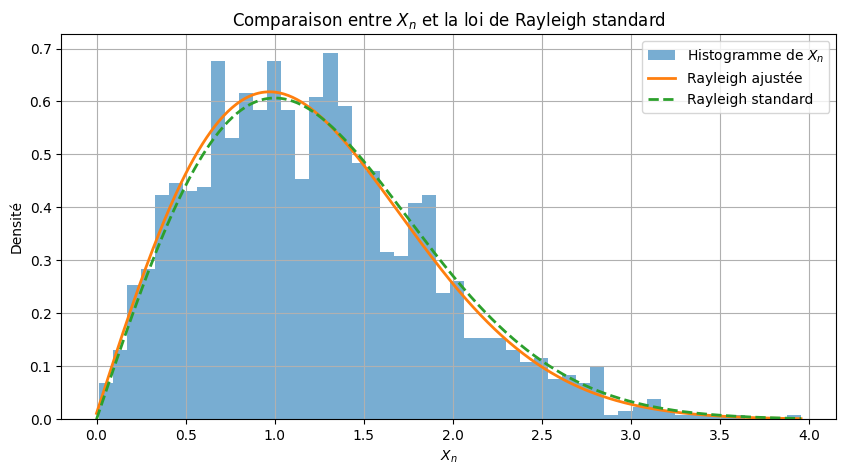

In [113]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import rayleigh

# Charger les données
with open("number_passes.pkl", "rb") as f:
    number_passes = pickle.load(f)

n_elements = 25000
x_n = [(n_elements - p) / math.sqrt(n_elements) for p in number_passes]

# Créer histogramme
plt.figure(figsize=(10, 5))
plt.hist(x_n, bins=50, density=True, alpha=0.6, label="Histogramme de $X_n$")

# Valeurs pour l'axe x
x_vals = np.linspace(0, max(x_n), 500)

# Courbe de densité Rayleigh ajustée aux données
fitted_params = rayleigh.fit(x_n)
fitted_pdf = rayleigh.pdf(x_vals, *fitted_params)
plt.plot(x_vals, fitted_pdf, label="Rayleigh ajustée", linewidth=2)

# Courbe de la densité Rayleigh standard
standard_pdf = rayleigh.pdf(x_vals, loc=0, scale=1)
plt.plot(x_vals, standard_pdf, '--', label="Rayleigh standard", linewidth=2)

plt.title("Comparaison entre $X_n$ et la loi de Rayleigh standard")
plt.xlabel("$X_n$")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()


In [114]:
from scipy.stats import ks_1samp, rayleigh

# Ajustement des paramètres Rayleigh
params = rayleigh.fit(x_n)  # renvoie (loc, scale)

# Test KS (H0 : les données suivent une Rayleigh avec ces paramètres)
# On utilise la CDF ajustée
D, p_value = ks_1samp(x_n, lambda x: rayleigh.cdf(x, *params))

print(f"KS statistic: {D:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("On ne rejette pas H0 : distribution compatible avec Rayleigh (5% niveau).")
else:
    print("On rejette H0 : distribution différente de Rayleigh.")


KS statistic: 0.0153, p-value: 0.8314
On ne rejette pas H0 : distribution compatible avec Rayleigh (5% niveau).


In [115]:
params

(-0.010854767857464358, 0.9811201428024535)

In [116]:
from scipy.stats import cramervonmises 
import math

with open("number_passes.pkl", "rb") as f:
    number_passes = pickle.load(f)
    
n_elements = 25000
x_n = [(n_elements - p) / math.sqrt(n_elements) for p in number_passes]

loc, scale = rayleigh.fit(x_n)

result = cramervonmises(x_n, 'rayleigh', args=(0,1))
print(f"CvM statistic: {result.statistic}, p-value: {result.pvalue}")

CvM statistic: 0.4708924774563417, p-value: 0.0472472108898373


In [117]:
print(np.mean(x_n))
print(math.sqrt(math.pi/2))
print(np.round(abs(np.mean(x_n) - math.sqrt(math.pi/2)),4))

1.2175688926967583
1.2533141373155001
0.0357


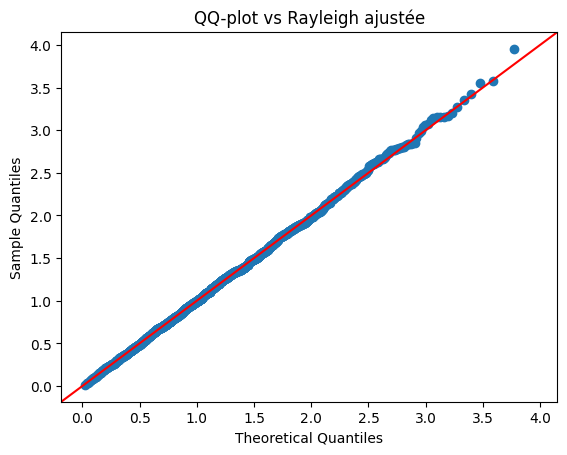

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import rayleigh

with open("number_passes.pkl", "rb") as f:
    number_passes = pickle.load(f)

n_elements = 25000
x_n = [(n_elements - p) / math.sqrt(n_elements) for p in number_passes]

# params = (loc, scale) retournés par rayleigh.fit
loc, scale = rayleigh.fit(x_n)

# QQ-plot vs Rayleigh ajustée
sm.qqplot(np.asarray(x_n), dist=rayleigh, distargs=(), loc=loc, scale=scale, line='45')
plt.title("QQ-plot vs Rayleigh ajustée")
plt.show()


In [64]:
import numpy as np


from scipy.stats import cramervonmises 
import math
n_elements = 20000

with open("number_passes.pkl", "rb") as f:
    number_passes = pickle.load(f)
    
while True:
    number_passes_random = np.random.choice(number_passes, size=5000,replace=False)
    x_n = [(n_elements - p) / math.sqrt(n_elements) for p in number_passes_random]

    result = cramervonmises(x_n, 'rayleigh', args=(0,1))
    params = rayleigh.fit(x_n)  # renvoie (loc, scale)

    D, p_value = ks_1samp(x_n, lambda x: rayleigh.cdf(x, *params))

    if result.pvalue > 0.85 and p_value > 0.85:
        print(f"CvM statistic: {result.statistic}, p-value: {result.pvalue}")
        print(f"KS statistic: {D}, p-value: {p_value}")
        break

CvM statistic: 0.052222839489946035, p-value: 0.8626882808609408
KS statistic: 0.008410657933081711, p-value: 0.8681527102168146


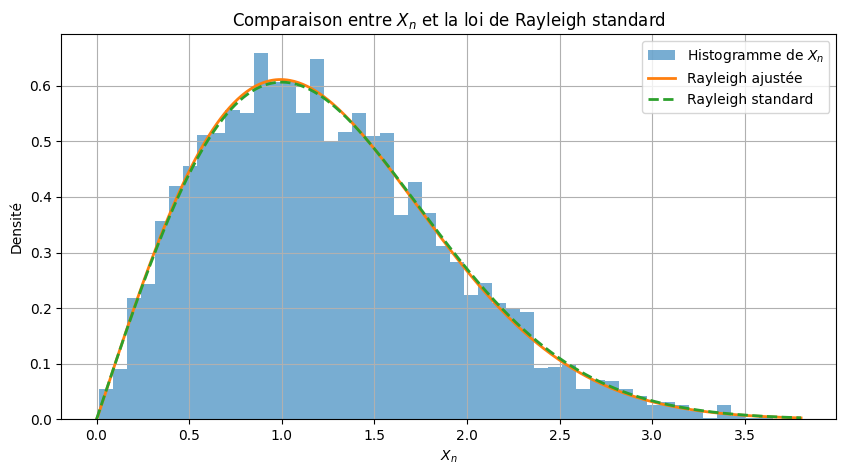

In [65]:
# Créer histogramme
plt.figure(figsize=(10, 5))
plt.hist(x_n, bins=50, density=True, alpha=0.6, label="Histogramme de $X_n$")

# Valeurs pour l'axe x
x_vals = np.linspace(0, max(x_n), 500)

# Courbe de densité Rayleigh ajustée aux données
fitted_params = rayleigh.fit(x_n)
fitted_pdf = rayleigh.pdf(x_vals, *fitted_params)
plt.plot(x_vals, fitted_pdf, label="Rayleigh ajustée", linewidth=2)

# Courbe de la densité Rayleigh standard
standard_pdf = rayleigh.pdf(x_vals, loc=0, scale=1)
plt.plot(x_vals, standard_pdf, '--', label="Rayleigh standard", linewidth=2)

plt.title("Comparaison entre $X_n$ et la loi de Rayleigh standard")
plt.xlabel("$X_n$")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()
